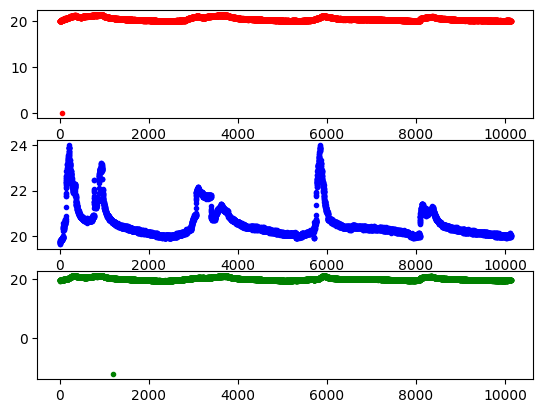

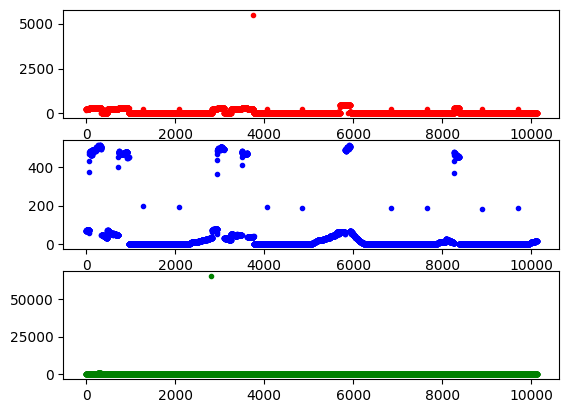

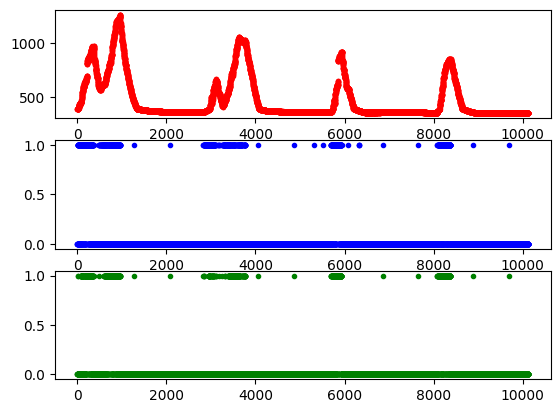

S1Temp
Quantile method
Identified outliers: 1
STD Method
Identified outliers: 1

S2Temp
Quantile method
Identified outliers: 901
STD Method
Identified outliers: 282

S3Temp
Quantile method
Identified outliers: 1
STD Method
Identified outliers: 1

S1Light
Quantile method
Identified outliers: 1948
STD Method
Identified outliers: 223

S2Light
Quantile method
Identified outliers: 1061
STD Method
Identified outliers: 466

CO2
Quantile method
Identified outliers: 1142
STD Method
Identified outliers: 157

PIR1
Quantile method
Identified outliers: 1090
STD Method
Identified outliers: 0

PIR2
Quantile method
Identified outliers: 956
STD Method
Identified outliers: 956

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/tmp/ipykernel_28579/3787627342.py:59: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = data_df.quantile(q=[0.25, 0.75])
/tmp/ipykernel_28579/3787627342.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_processed[column] = (x_processed[column] - x_processed[column].min()) / (x_processed[column].max() - x_processed[column].min())


In [1]:
#just for vizualization 
import pandas as pd
import matplotlib.pyplot as plt
from numpy import percentile
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#references:
#https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
#https://www.geeksforgeeks.org/data-normalization-with-pandas/
#https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

#to do in project:
####--->read file 
####--->remove outliers (by quartiles or deviation) (we need to remove those points in 4 and 6)
####--->normalization (z score, min max)
####--->split data into train, test, validation
####--->train the NN
####--->ajust parameters 
####--->make the function required by the professor

data_df = pd.read_csv('Proj1_Dataset.csv', sep=',', decimal='.')

plt.figure()
plt.subplot(311)
plt.scatter(data_df.index.values, data_df['S1Temp'], color='r', marker='.');
plt.subplot(312)
plt.scatter(data_df.index.values, data_df['S2Temp'], color='b', marker='.');    #aquecedor ou algo do género (luz)
plt.subplot(313)
plt.scatter(data_df.index.values, data_df['S3Temp'], color='g', marker='.');
plt.show()


plt.figure()
plt.subplot(311)
plt.scatter(data_df.index.values, data_df['S1Light'], color='r', marker='.');
plt.subplot(312)
plt.scatter(data_df.index.values, data_df['S2Light'], color='b', marker='.');
plt.subplot(313)
plt.scatter(data_df.index.values, data_df['S3Light'], color='g', marker='.');
plt.show()

plt.figure()
plt.subplot(311)
plt.scatter(data_df.index.values, data_df['CO2'], color='r', marker='.');
plt.subplot(312)
plt.scatter(data_df.index.values, data_df['PIR1'], color='b', marker='.');
plt.subplot(313)
plt.scatter(data_df.index.values, data_df['PIR2'], color='g', marker='.');
plt.show()


#split the data into his inputs and outputs (x_df, y_df)
y_df = data_df[["Persons"]]
x_df = data_df[["S1Temp", "S2Temp", "S3Temp", "S1Light", "S2Light", "CO2", "PIR1", "PIR2"]]
#podemos fazer isto ou damos logo o nome x_df e damos pop???(isto porque o custo de x_df = data_df é grande)

#calculates the quantiles and the interquantile range
quantiles = data_df.quantile(q=[0.25, 0.75])
difference = quantiles.diff() 
index_list = list(difference.index)
difference = difference.drop(index_list[0],axis=0)
difference = difference.rename(index={index_list[1]:'iqr'}) 
quantiles = pd.concat([quantiles, difference], axis=0)

###for debbug###
#print(a_list)
#print(difference)
#print(quantiles)

for column in x_df:
    
    print(column)
    print("Quantile method")
    cut_off = quantiles[column][2] * 1.5
    #print(cut_off, "\n")
    lower, upper = quantiles[column][0] - cut_off, quantiles[column][1] + cut_off
    outliers = [x for x in x_df[column] if x < lower or x > upper]
    
    
    #in case there are less than 1% outliers then they really are outliers 
    if(len(outliers) < x_df.shape[0]*0.01):
        x_processed = [x for x in x_df[column] if x >= lower and x <= upper]
    
    
    print('Identified outliers: %d' % len(outliers))
    
    
    print("STD Method")
    mean = x_df[column].mean()
    std = x_df[column].std()
    cut_off_1 = std * 3
    lower_1, upper_1 = mean - cut_off_1, mean + cut_off_1
    outliers_1 = [x for x in data_df[column] if x < lower_1 or x > upper_1]
    print('Identified outliers: %d\n' % len(outliers_1))
    #print("Mean - ", x_df[column].mean())
    #print("Std - ", x_df[column].std())
    
    # Select column contents by column
    # name using [] operator
    #columnSeriesObj = x_df[column]
    #print('Column Name : ', column)
    #print('Column Contents : ', columnSeriesObj.values)

print(outliers_1)

#normalized_df=(x_processed-x_processed.min())/(x_processed.max()-x_processed.min())
#print(normalized_df)
    

#just for testing 
#min - max normalization
x_processed = x_df
#x_processed["S1Temp"] = (x_processed["S1Temp"]-x_processed["S1Temp"].min()) / (x_processed["S1Temp"].max()-x_processed["S1Temp"].min())
cols_to_normalize = ['S1Temp','S2Temp','S3Temp','S1Light','S2Light','CO2','PIR1','PIR2']
for column in cols_to_normalize:
    x_processed[column] = (x_processed[column] - x_processed[column].min()) / (x_processed[column].max() - x_processed[column].min())


    
    
    

    

